This model is meant to predict whether a student will be accepted into a school/degree based on their academic acheivements, and to discover which academic acheivements are important to different schools/programs.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
from matplotlib import pyplot

We made a set of fake data here, so that we could have something to test and run our site on. 

In [2]:
# Set random seed for reproducibility
np.random.seed(50)

# Number of samples
n_samples = 1000



prob_academic_course= 0.2  # Probability a student took academic courses
prob_preparatory_course= 0.6  # Probability a student took preparatory courses
prob_psychometric = 0.6  # Probability a student took the psychometric test
prob_degree_average = 0.2  # Probability a student has a degree average

# Generates random high school grades and ensures the total units add up to 21 
# we assume that everyone took high school courses
def generate_high_school_data(n_samples):
    data = {}
    
    subjects = [
        'englishGrade',
        'literatureGrade',
        'mathGrade',
        'tanachGrade',
        'civicsGrade',
        'hebrewGrade',
        'historyGrade',
        'elective1Grade',
    ]

    # Generate grades
    for grade in subjects:
        data[grade] = np.random.uniform(60, 100, n_samples)

    return data

def generate_academic_courses(n_samples, prob_academic_course, high_school_grades):
    # Initialize arrays to store the results
    grade1 = np.zeros(n_samples)
    points1 = np.zeros(n_samples)
    grade2 = np.zeros(n_samples)
    points2 = np.zeros(n_samples)
    
    for i in range(n_samples):
       
        if np.random.rand() < prob_academic_course:
            grade1[i] = 0 if  np.random.randint(0, 6) == 0 else (np.random.uniform(60, 100))
        else:
            grade1[i] = 0
        if np.random.rand() < prob_academic_course:
            grade2[i] = 0 if  np.random.randint(0, 6) == 0 else (np.random.uniform(60, 100))
        else:
            grade2[i] = 0     
    
    return {
        'grade1': grade1,
        'grade2': grade2,
    }


def generate_preparatory_courses(n_samples, prob_optional_course, high_school_grades):
    # Initialize arrays to store the results
    mathScore = np.zeros(n_samples)
    physicsScore = np.zeros(n_samples)
    englishScore = np.zeros(n_samples)
    scientificWritingScore = np.zeros(n_samples)
    
    for i in range(n_samples):
       
        if np.random.rand() < prob_preparatory_course:
            mathScore[i] = np.random.uniform(40, 100)         
            mathScore[i] = 0 if mathScore[i] < 60 else (mathScore[i])
        else:
            mathScore[i] = 0          
        if np.random.rand() < prob_preparatory_course:           
            physicsScore[i] = np.random.uniform(40, 100)
            physicsScore[i] = 0 if physicsScore[i] < 60 else (physicsScore[i])
            
        else:
            physicsScore[i] = 0
              
        if np.random.rand() < prob_preparatory_course:
            englishScore[i] = np.random.uniform(40, 100)
            englishScore[i] = 0 if englishScore[i] < 60 else (englishScore[i])
        else:  
            englishScore[i] = 0       
        if np.random.rand() < prob_preparatory_course:
            scientificWritingScore[i] = np.random.uniform(40, 100)
            scientificWritingScore[i] = 0 if scientificWritingScore[i] < 60 else (scientificWritingScore[i])
        else:
            scientificWritingScore[i] = 0  
    
    return {
        'mathScore': mathScore,
        'physicsScore': physicsScore,
        'englishScore': englishScore,
        'scientificWritingScore': scientificWritingScore
    }

def normalize_psychometric_score(score):
    return (score - 50) * (100 / 100)  # Transform from 50-150 to 0-100

def generate_psychometric_scores(n_samples, high_school_grades, prob_psychometric):
    # Initialize arrays to store the results
    general_grade = np.zeros(n_samples)
    verbal_score = np.zeros(n_samples)
    english_score = np.zeros(n_samples)
    quantitative_score = np.zeros(n_samples)
    
    for i in range(n_samples):
        # Calculate the average of high school grades for the current student
        
        if np.random.rand() < prob_psychometric:
            # Generate psychometric scores with some correlation to high school average
            verbal_score[i] = np.random.uniform(50, 150) 
            english_score[i] = np.random.uniform(50, 150) 
            quantitative_score[i] = np.random.uniform(50, 150) 
        else:
            # Introduce missing values
            verbal_score[i] = 0
            english_score[i] = 0
            quantitative_score[i] = 0
    
    psychometric_scores = {
        'verbal_score': verbal_score,
        'english_score': english_score,
        'quantitative_score': quantitative_score
    }
    return psychometric_scores

def generate_degree_average(n_samples, prob_degree_average, high_school_grades):
    # Initialize the degree_average array
    degree_average = np.zeros(n_samples)
    
    for i in range(n_samples):
       
        if np.random.rand() < prob_degree_average:
            degree_average[i] = np.random.uniform(60, 100)
        else:
            degree_average[i] = 0
    
    return {'degree_average': degree_average}


high_school_data = generate_high_school_data(n_samples)
academic_courses = generate_academic_courses(n_samples, prob_academic_course, high_school_data)
preparatory_courses = generate_preparatory_courses(n_samples, prob_preparatory_course, high_school_data)
psychometric_scores = generate_psychometric_scores(n_samples, high_school_data, prob_psychometric)
degree_average = generate_degree_average(n_samples, prob_degree_average, high_school_data)

def generate_averages(n_samples, high_school_data, academic_courses, preparatory_courses, psychometric_scores):
    high_school_average = np.zeros(n_samples)
    academic_course_average = np.zeros(n_samples)
    prep_course_average = np.zeros(n_samples)
    psychometric_scores_average = np.zeros(n_samples)
    
    for i in range(n_samples):
        high_school_grades = [high_school_data[key][i] for key in high_school_data if 'Grade' in key]
        high_school_average[i] = np.mean(high_school_grades) if high_school_grades else 0
        
        academic_grades = [academic_courses[key][i] for key in academic_courses if 'grade' in key and academic_courses[key][i] > 0]
        academic_course_average[i] = np.mean(academic_grades) if academic_grades else 0
        
        prep_grades = [preparatory_courses[key][i] for key in preparatory_courses if 'Score' in key and preparatory_courses[key][i] > 0]
        prep_course_average[i] = np.mean(prep_grades) if prep_grades else 0
        
        psychometric_grades = [psychometric_scores[key][i] for key in psychometric_scores if 'score' in key and psychometric_scores[key][i] > 0]
        psychometric_scores_average[i] = np.mean(psychometric_grades) if psychometric_grades else 0
        
        if psychometric_scores_average[i] > 0:
            psychometric_scores_average[i] = normalize_psychometric_score(psychometric_scores_average[i])
    averages = {
        'high_school_average': high_school_average,
        'academic_course_average': academic_course_average,
        'prep_course_average': prep_course_average,
        'psychometric_scores_average': psychometric_scores_average
    }
    return averages


def generate_accepted_column(n_samples, averages, degree_average):
    # Define the threshold for acceptance
    threshold = 75
    
    # Initialize the accepted and weighted average arrays
    accepted = np.zeros(n_samples)
    weighted_average = np.zeros(n_samples)
    nums = np.zeros(n_samples)
    
    for i in range(n_samples):
        # Check which categories are present
        num_present_others = 0
        present_categories = {
            'high_school': averages['high_school_average'][i] > 0,
            'academic': averages['academic_course_average'][i] > 0,
            'preparatory': averages['prep_course_average'][i] > 0,
            'psychometric': averages['psychometric_scores_average'][i] > 0,
            'degree': degree_average['degree_average'][i] > 0
        }
        
        # Count the number of present categories excluding high school
        num_present_others = sum(present_categories.values()) - present_categories['high_school']
        nums[i] = num_present_others
        
        dynamic_weights = {}
        if num_present_others == 1:
            # High school + 1 other
            for k, v in present_categories.items():
                if v and k != 'high_school':
                    dynamic_weights['high_school'] = 0.6
                    dynamic_weights[k] = 0.4
        elif num_present_others == 2:
            # High school + 2 others
            for k, v in present_categories.items():
                if v and k != 'high_school':
                    dynamic_weights['high_school'] = 0.4
                    dynamic_weights[k] = 0.3
        elif num_present_others == 3:
            # High school + 3 others
            for k, v in present_categories.items():
                if v and k != 'high_school':
                    dynamic_weights['high_school'] = 0.3
                    dynamic_weights[k] = 0.7 / 3
        elif num_present_others == 4:
            # High school + 4 others
            for k, v in present_categories.items():
                if v and k != 'high_school':
                    dynamic_weights['high_school'] = 0.2
                    dynamic_weights[k] = 0.8 / 4
        else:
                    dynamic_weights['high_school'] = 0.5
                    dynamic_weights['academic'] = 0
                    dynamic_weights['preparatory'] = 0
                    dynamic_weights['psychometric'] = 0
                    dynamic_weights['degree'] = 0

        weighted_average[i] = (
            averages['high_school_average'][i] * dynamic_weights.get('high_school', 0) +
            averages['academic_course_average'][i] * dynamic_weights.get('academic', 0) +
            averages['prep_course_average'][i] * dynamic_weights.get('preparatory', 0) +
            averages['psychometric_scores_average'][i] * dynamic_weights.get('psychometric', 0) +
            degree_average['degree_average'][i] * dynamic_weights.get('degree', 0)
        )
        # Assign accepted value based on the weighted average grade
        accepted[i] = 1 if weighted_average[i] >= threshold else 0
    
    accepted_dict = {
        'accepted': accepted,
        'weighted_average': weighted_average,
       
    }   
    return accepted_dict



averages = generate_averages(n_samples, high_school_data, academic_courses, preparatory_courses,psychometric_scores)
accepted_column = generate_accepted_column(n_samples, averages, degree_average)

# Combine all data into a single DataFrame
data = {**accepted_column,**averages, **high_school_data, **academic_courses, **preparatory_courses, **psychometric_scores, **degree_average}
df = pd.DataFrame(data)

# Show the first few rows of the DataFrame
print(df.head())

   accepted  weighted_average  high_school_average  academic_course_average  \
0       1.0         80.410910            87.749795                 0.000000   
1       1.0         77.827471            85.669043                 0.000000   
2       0.0         67.390172            79.395216                 0.000000   
3       0.0         38.517675            77.035351                 0.000000   
4       0.0         71.130763            79.887007                61.927699   

   prep_course_average  psychometric_scores_average  englishGrade  \
0            80.693348                    70.343293     79.784066   
1            67.444734                     0.000000     69.123324   
2            79.921361                    46.458296     70.218957   
3             0.000000                     0.000000     75.853196   
4            68.658836                     0.000000     75.092604   

   literatureGrade  mathGrade  tanachGrade  ...     grade1  grade2  mathScore  \
0        95.218580  69.426525

once we have data, we need to make sure everything is numeric and ok for training-

In [3]:
df = pd.read_csv("C:\\Users\\Ariela Epstein\\react-website\\src\\Backend\\student_data_final_testing.csv")
print(df.head()) 




   accepted  englishGrade  literatureGrade  mathGrade  tanachGrade  \
0         1     79.784066        95.218580  69.426525    85.893020   
1         1     69.123324        86.084851  90.317795    94.462857   
2         0     70.218957        71.117327  68.524982    72.572576   
3         0     75.853196        72.787243  67.281685    79.845809   
4         0     75.092604        61.236737  82.967637    70.636116   

   civicsGrade  hebrewGrade  historyGrade  hebrewForArabicSpeakersGrade  \
0    91.399184    88.221680     94.607345                             0   
1    89.174654    95.987626     83.806363                             0   
2    69.881551    88.809555     94.750607                             0   
3    70.349154    82.654339     76.512719                             0   
4    89.212388    99.524860     78.683874                             0   

   arabicGrade  ...  english_score  quantitative_score  degree_average  \
0            0  ...      99.719914          127.936707

In [4]:
df = pd.DataFrame(df)

# Show the first few rows of the DataFrame
print(df.head())

# Mapping dictionary for degree types
degree_mapping = {'B.Sc.': 1, 'M.Sc.': 2, 'B.A.': 3, 'M.A.': 4}  # Assign 0 to represent unknown types

# Convert string values to numeric
df['Type'] = df['Type'].map(degree_mapping)

# Show the first few rows of the DataFrame
print(df.head())

   accepted  englishGrade  literatureGrade  mathGrade  tanachGrade  \
0         1     79.784066        95.218580  69.426525    85.893020   
1         1     69.123324        86.084851  90.317795    94.462857   
2         0     70.218957        71.117327  68.524982    72.572576   
3         0     75.853196        72.787243  67.281685    79.845809   
4         0     75.092604        61.236737  82.967637    70.636116   

   civicsGrade  hebrewGrade  historyGrade  hebrewForArabicSpeakersGrade  \
0    91.399184    88.221680     94.607345                             0   
1    89.174654    95.987626     83.806363                             0   
2    69.881551    88.809555     94.750607                             0   
3    70.349154    82.654339     76.512719                             0   
4    89.212388    99.524860     78.683874                             0   

   arabicGrade  ...  english_score  quantitative_score  degree_average  \
0            0  ...      99.719914          127.936707

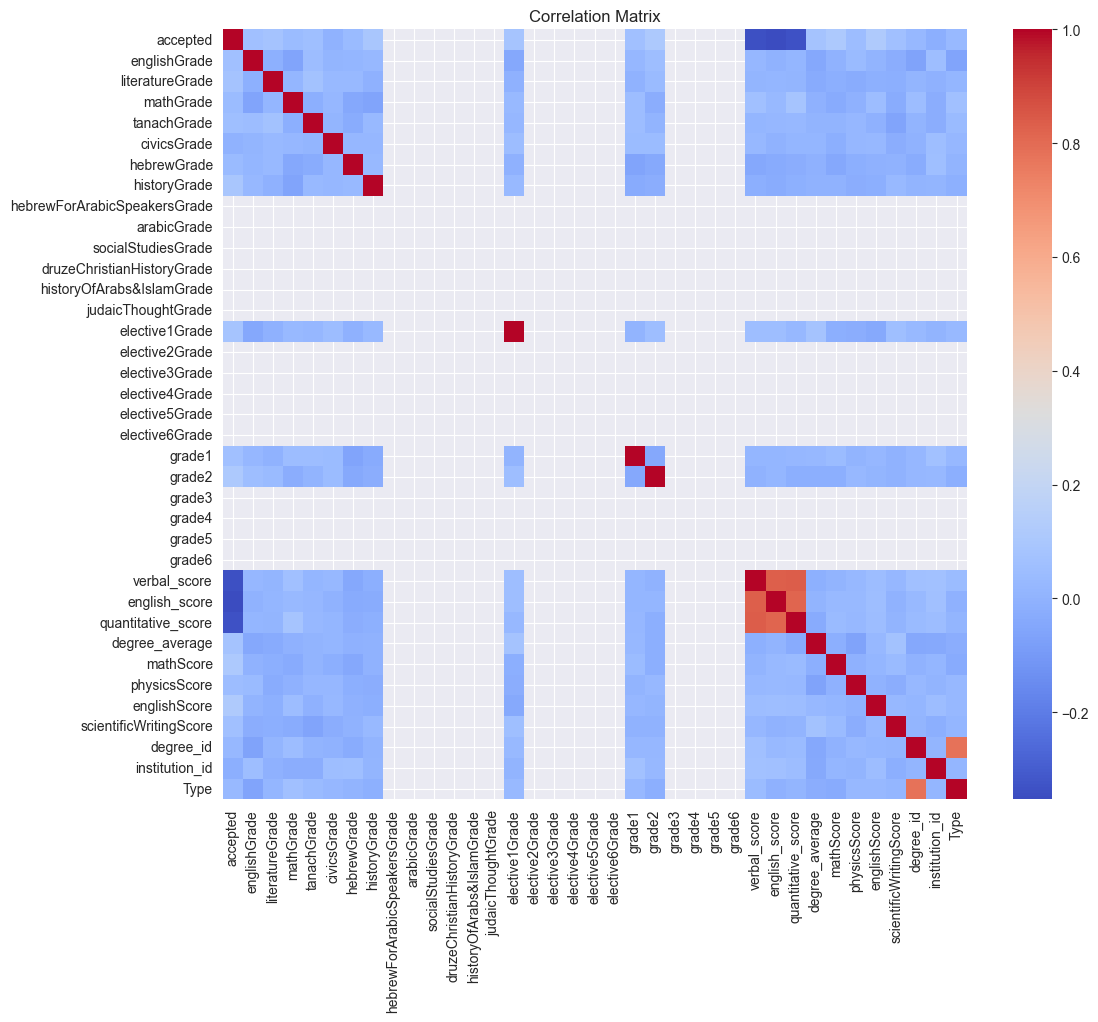

In [5]:

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Training Models

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

target=df['accepted']
train_data=df.drop('accepted',axis=1)


X_train_data,X_test,target_train_data,target_test=train_test_split(train_data,target,test_size=0.30,random_state=101)

In [8]:
knn = KNeighborsClassifier(n_neighbors=2)  # You can choose the number of neighbors (k)

# Train the classifier
knn.fit(X_train_data, target_train_data)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(target_test, y_pred)
print(f'Accuracy: {accuracy_knn * 100:.2f}%')

Accuracy: 76.00%


In [9]:
logreg = LogisticRegression()
logreg.fit(X_train_data, target_train_data)
Y_pred = logreg.predict(X_test)
accuracy_log = accuracy_score(target_test, Y_pred)
print(f'Accuracy: {accuracy_log * 100:.2f}%')

Accuracy: 70.33%


In [10]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train_data, target_train_data)
Y_pred = svc.predict(X_test)
accuracy_svm = accuracy_score(target_test, Y_pred)
print(f'Accuracy: {accuracy_svm * 100:.2f}%')

Accuracy: 84.00%


In [11]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train_data, target_train_data)
Y_pred = gaussian.predict(X_test)
accuracy_gnb = accuracy_score(target_test, Y_pred)
print(f'Accuracy: {accuracy_gnb * 100:.2f}%')

Accuracy: 73.67%


In [12]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train_data, target_train_data)
Y_pred = perceptron.predict(X_test)
accuracy_p = accuracy_score(target_test, Y_pred)
print(f'Accuracy: {accuracy_p * 100:.2f}%')

Accuracy: 50.67%


In [13]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train_data, target_train_data)
Y_pred = linear_svc.predict(X_test)
accuracy_svc = accuracy_score(target_test, Y_pred)
print(f'Accuracy: {accuracy_svc * 100:.2f}%')

Accuracy: 52.00%


In [14]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train_data, target_train_data)
Y_pred = sgd.predict(X_test)
accuracy_sgd = accuracy_score(target_test, Y_pred)
print(f'Accuracy: {accuracy_sgd * 100:.2f}%')

Accuracy: 58.67%


In [15]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_data, target_train_data)
Y_pred = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(target_test, Y_pred)
print(f'Accuracy: {accuracy_dt * 100:.2f}%')

Accuracy: 79.67%


In [16]:

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_data, target_train_data)
Y_pred = random_forest.predict(X_test)

accuracy_rfc = accuracy_score(target_test, Y_pred)
print(f'Accuracy: {accuracy_rfc * 100:.2f}%')

Accuracy: 84.00%


In [17]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [accuracy_svm, accuracy_knn, accuracy_log, 
              accuracy_rfc, accuracy_gnb, accuracy_p, 
              accuracy_sgd, accuracy_svc, accuracy_dt]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,0.840000
3,Random Forest,0.840000
8,Decision Tree,0.796667
1,KNN,0.760000
4,Naive Bayes,0.736667
2,Logistic Regression,0.703333
6,Stochastic Gradient Decent,0.586667
7,Linear SVC,0.520000
5,Perceptron,0.506667


download data

In [ ]:
df.to_csv('student_data_final_testing.csv', index=False)

Shap Values Calculate

In [ ]:
import shap
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
shap.initjs()

df = pd.read_csv("C:\\Users\\Ariela Epstein\\react-website\\src\\Backend\\student_data_final_testing.csv")

# Mapping dictionary for degree types
degree_mapping = {'B.Sc.': 1, 'M.Sc.': 2, 'B.A.': 3, 'M.A.': 4}  # Assign 0 to represent unknown types

# Convert string values to numeric
df['Type'] = df['Type'].map(degree_mapping)

# Show the first few rows of the DataFrame
print(len(df))
df.head()


np.shape(shap_values.values)

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap

# Load the dataset
df = pd.read_csv("C:\\Users\\Ariela Epstein\\react-website\\src\\Backend\\student_data_final_testing.csv")


# Mapping dictionary for degree types
degree_mapping = {'B.Sc.': 1, 'M.Sc.': 2, 'B.A.': 3, 'M.A.': 4}  # Assign 0 to represent unknown types

# Convert string values to numeric
df['Type'] = df['Type'].map(degree_mapping)


# Identify features and target
target = df['accepted']
train_data = df.drop('accepted', axis=1)

feature_names = train_data.columns.tolist()
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)
    
# Split the data
X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.3, random_state=101)

# Train a RandomForest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Compute SHAP values
explainer = shap.Explainer(random_forest, X_train)
shap_values = explainer(X_test)


shap_values_for_positive_class = shap_values.values[..., 1]

# Ensure the shapes match
assert shap_values_for_positive_class.shape[0] == X_test.shape[0], "Mismatch in number of rows between SHAP values and test data"
assert shap_values_for_positive_class.shape[1] == X_test.shape[1], "Mismatch in number of columns between SHAP values and test data"

# Calculate mean absolute SHAP value for each feature
feature_importances = np.mean(np.abs(shap_values_for_positive_class), axis=0)

# Create a DataFrame to display the feature importances
feature_importances_df = pd.DataFrame({
    'Feature': train_data.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Create the SHAP summary plot
plot_size = (20, 10)  # Width, height in inches
shap.summary_plot(shap_values_for_positive_class, X_test, feature_names=train_data.columns, plot_size=plot_size)


In [ ]:
import shap
import matplotlib.pyplot as plt

# Assuming you have already computed SHAP values for the positive class
# shap_values_for_positive_class = ...

# Reshape shap_values_for_positive_class to match the expected format
shap_values_for_positive_class_exp = shap.Explanation(values=shap_values_for_positive_class, base_values=explainer.expected_value, data=X_test, feature_names=train_data.columns)

# Generate bar plot for positive class SHAP values
shap.plots.bar(shap_values_for_positive_class_exp)
plt.show()
